#  **Inversiones inmobiliarias para alquiler vacacional - Paris, Île-de-France, France**

#### Author: Lina María Gómez Mesa

Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. A continuación, se muestra el trabajo realizado con el fin de ayudar a dos inversiones a saber en qué invertir en AirBnB.

**Dataset:** AirBnb Listings - Paris, Île-de-France, France [[dataset](https://insideairbnb.com/paris/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

## **TABLA DE CONTENIDO**
1. [Selección del dataset de trabajo](###1-Dataset-selection)
2. [Entendimiento inicial de datos](###2-Data-understanding)
    - 2.1. [Carga de los datos](####2.1-Imports)
    - 2.2. [Tipo de datos](####2.2-Type-of-data)
    - 2.3. [Reporte general](####2.3-Report)
    - 2.4. [Análisis univariado](####2.4-Univariate-Analysis)
        - 2.4.1 [Precio](#####2.4.1-Price)
        - 2.4.2 [Room type](#####2.4.2-Room-type)
        - 2.4.3 [Neighborhood](#####2.4.3-Neighborhood)
        - 2.4.4 [Availability-365](#####2.4.4-Availability-365)
3. [ Estrategia de análisis](###3-Analysis-strategy)
4. [Desarrollo de la estrategia](###4-Strategy-development)
    - 4.1 [Análisis descriptivo](####4.1-Analisis-descriptivo)
    - 4.2 [Data visualization](####4.2-Data-visualizations)
    - 4.3 [Pruebas de hipótesis](####4.3-Pruebas-de-hipotesis)
5. [Generación de resultados](###5-Result-generation)

### **1-Dataset-selection**
Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. En esta ocasión, se decidió seleccionar como ciudad a $\textbf{Paris, Île-de-France, France}$. 

<div align="center">
    <img src="utils/paris.png" alt="Paris">
</div>


### **2-Data-understanding**

#### **2.1-Imports**

Se realiza la importación de las librerías necesarias para realizar el análisis preliminar.

In [1]:
##############################
# IMPORTS
##############################
# Manejo de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Analisis profundo de datos
from ydata_profiling import ProfileReport

# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("Data/detailed_listings.csv")

# Showing dataframe dimensions
listings_df.shape
print(f"There are a total of {listings_df.shape[0]} rows and {listings_df.shape[1]} columns in the dataframe.")

There are a total of 95461 rows and 75 columns in the dataframe.


#### **2.2-Type-of-data**

In [3]:
# Showing column types
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95461 non-null  int64  
 1   listing_url                                   95461 non-null  object 
 2   scrape_id                                     95461 non-null  int64  
 3   last_scraped                                  95461 non-null  object 
 4   source                                        95461 non-null  object 
 5   name                                          95461 non-null  object 
 6   description                                   91385 non-null  object 
 7   neighborhood_overview                         48179 non-null  object 
 8   picture_url                                   95459 non-null  object 
 9   host_id                                       95461 non-null 

In [4]:
numerical_columns = listings_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total of numerical columns: {listings_df.select_dtypes(include=['int64', 'float64']).shape[1]}")
categorical_columns = listings_df.select_dtypes(include=['object']).columns
print(f"Total of categorical columns: {listings_df.select_dtypes(include=['object']).shape[1]}")

assert listings_df.shape[1] == listings_df.select_dtypes(include=['int64', 'float64']).shape[1] + listings_df.select_dtypes(include=['object']).shape[1]

Total of numerical columns: 40
Total of categorical columns: 35


In [5]:
# Showing a sample of n rows
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
39620,624510790896219377,https://www.airbnb.com/rooms/624510790896219377,20240906025355,2024-09-07,previous scrape,Paris 18eme : appartment 70 m2 with 2 bedrooms,This spacious 70 m2 apartment is on the 6th an...,"Quartier La Chapelle, a few minutes' walk from...",https://a0.muscache.com/pictures/miso/Hosting-...,74419111,https://www.airbnb.com/users/show/74419111,Victor,2016-05-28,"Paris, France","Parisian young daddy, I love to travel around ...",within a day,100%,89%,t,https://a0.muscache.com/im/pictures/user/6d2a4...,https://a0.muscache.com/im/pictures/user/6d2a4...,NaN,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Buttes-Montmartre,NaN,48.885790,2.355720,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,NaN,"[""Heating"", ""Hot water kettle"", ""Refrigerator""...",NaN,4,120,4,4,120,120,4.0,120.0,NaN,t,0,0,0,0,2024-09-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7511805319248,f,1,1,0,0,NaN
36567,53527532,https://www.airbnb.com/rooms/53527532,20240906025355,2024-09-10,city scrape,Bail code civil 7e Eiffel Tower 2 room flat,"Enjoy a new elegant, comfortable and central a...",Chic and commercial neighborhood of Gros-Caill...,https://a0.muscache.com/pictures/miso/Hosting-...,411403688,https://www.airbnb.com/users/show/411403688,Stephanie,2021-07-07,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/f4af6...,https://a0.muscache.com/im/pictures/user/f4af6...,NaN,1.0,2.0,"['email', 'phone']",t,t,Neighborhood highlights,Palais-Bourbon,NaN,48.859580,2.307620,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Elevator"", ""Long term stay...",$65.00,182,800,182,182,1125,1125,182.0,1125.0,NaN,t,0,0,0,100,2024-09-10,1,1,0,2023-10-31,2023-10-31,2.00,1.00,3.00,4.00,3.00,4.00,2.00,"Available with a mobility lease only (""bail mo...",t,1,1,0,0,0.09
42154,670872820344022524,https://www.airbnb.com/rooms/670872820344022524,20240906025355,2024-09-06,city scrape,Cosy 2 bedrooms apartment with bathrooms - Louvre,Welcome to your new Parisian home between the ...,"Between the Louvre Museum, Notre Dame and Le M...",https://a0.muscache.com/pictures/prohost-api/H...,156775524,https://www.airbnb.com/users/show/156775524,Merveil,2017-10-30,"Paris, France",Merveil is a leading luxury apartment manageme...,within an hour,85%,98%,f,https://a0.muscache.com/im/pictures/user/a740e...,https://a0.muscache.com/im/pictures/user/a740e...,Châtelet - Les Halles - Beaubourg,104.0,112.0,"['email', 'phone']",t,t,Neighborhood highlights,Entrepôt,NaN,48.870290,2.351500,Entire rental unit,Entire home/apt,8,2.0,2 baths,2.0,4.0,"[""Heating"", ""Hot water kettle"", ""Refrigerator""...",$435.00,3,365,1,3,1125,1125,2.8,1125.

#### **2.3-Report**

Se genera un reporte inicial para ver de las 75 variables cuáles son relevantes para los inversores. Este es: [Profiling Report](Docs/profiling.html)


In [ ]:
# pandas_profiling.ProfileReport(listings_df)
profiling = ProfileReport(listings_df.copy())
profiling.to_file("Docs/profiling.html")

Luego de revisar el reporte generado por PandasProfiling, se considera las siguientes las variables más relevantes:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **room_type** | [Entire home/apt,Private room,Shared room,Hotel] |
| **price** | Daily price in local currency|
| **availability_365** | The availability of the listing x days in the future as determined by the calendar. |
| **number_of_reviews** | The number of reviews the listing has|
| **neighbourhood_cleansed** | The neighbourhood as geocoded using the latitude and longitude against neighborhoods. |
| **accommodates** | The maximum capacity of the listing. |
| **license** | The licence permit, registration number. |
| **property_type** | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field. |
| **amenities** | features or services that enhance the comfort, convenience, or enjoyment of a space, facility, or community|
| **review_scores_rating** | Score given to the place |
| **review_scores_location** | Score given to the location |
| **minimum_nights** | minimum number of night stay for the listing (calendar rules may be different) |

In [6]:
filtered_df = listings_df[["room_type", "price", "availability_365", "number_of_reviews", "neighbourhood_cleansed", "accommodates", "license", "amenities", "property_type", "review_scores_rating", "review_scores_location", "minimum_nights"]]

In [7]:
filtered_numerical_columns = filtered_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total of numerical columns: {filtered_df.select_dtypes(include=['int64', 'float64']).shape[1]}")
filtered_categorical_columns = filtered_df.select_dtypes(include=['object']).columns
print(f"Total of categorical columns: {filtered_df.select_dtypes(include=['object']).shape[1]}")

Total of numerical columns: 6
Total of categorical columns: 6


Se observa cuáles de las columnas presentan valores nulos.

In [8]:
# checking for missing values and normalizing the data
(round((filtered_df.isnull().sum()/filtered_df.shape[0])*100,2)).sort_values(ascending=False)

price                     32.72
review_scores_location    28.45
review_scores_rating      28.43
license                   20.37
number_of_reviews          0.00
availability_365           0.00
room_type                  0.00
neighbourhood_cleansed     0.00
amenities                  0.00
accommodates               0.00
property_type              0.00
minimum_nights             0.00
dtype: float64

Después se volvió a realizar un segundo filtro para únicamente seleccionar 5 variables candidatas. Estas fueron:

1. **Room_type:** El tipo de cuarto puede influir en el atractivo de un alojamiento para los turistas y en los ingresos por alquiler que obtengan los inversores.
2. **Price:** Este es un factor crucial, ya que afecta directamente los ingresos potenciales y la rentabilidad de un Airbnb. Dado que el objetivo para el inversor es maximizar su número de ganancias esta variable es crucial.
3. **Availability_365:** This variable indicates the number of days a listing is available for booking throughout the year. It is a direct measure of occupancy potential, which is key for generating rental income.
4. **Neighborhood_cleansed:** El barrio es importante dado que dependiendo del barrio este puede influir en la seguridad y qué tan cerca se encuentra el airbnb a lugares turísticos.
5. **Accomodates:** La capacidad de alojamiento es un factor clave para atraer y satisfacer a los huéspedes, además de influir en las tarifas y la rentabilidad de una propiedad.

#### **2.4-Univariate-Analysis**

##### **2.4.1-Price**

In [9]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

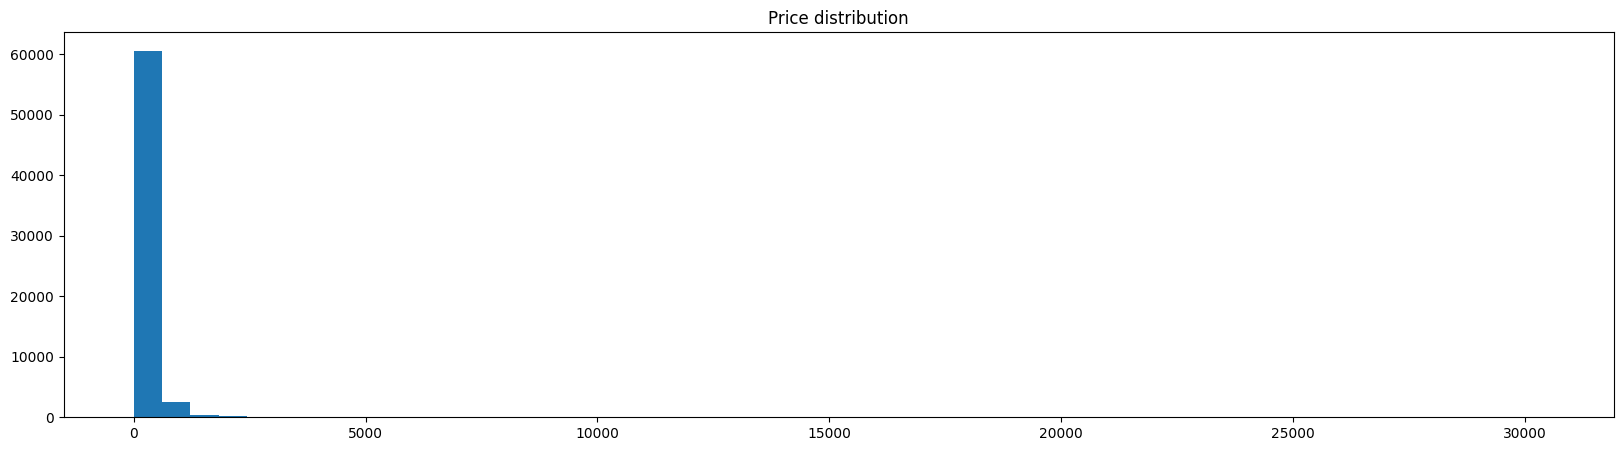

In [10]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [11]:
# calculo de los cuartiles y outliers
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers_below = listings_df["price_float"] < lower_bound
outliers_above = listings_df["price_float"] > upper_bound
total_outliers = outliers_below.sum() + outliers_above.sum()

print(f"Total number of outliers: {total_outliers}")
print(f"Percentage of outliers: {round(total_outliers/listings_df.shape[0]*100, 2)}%")

Lower bound: -126.5
Upper bound: 485.5
Total number of outliers: 5770
Percentage of outliers: 6.04%


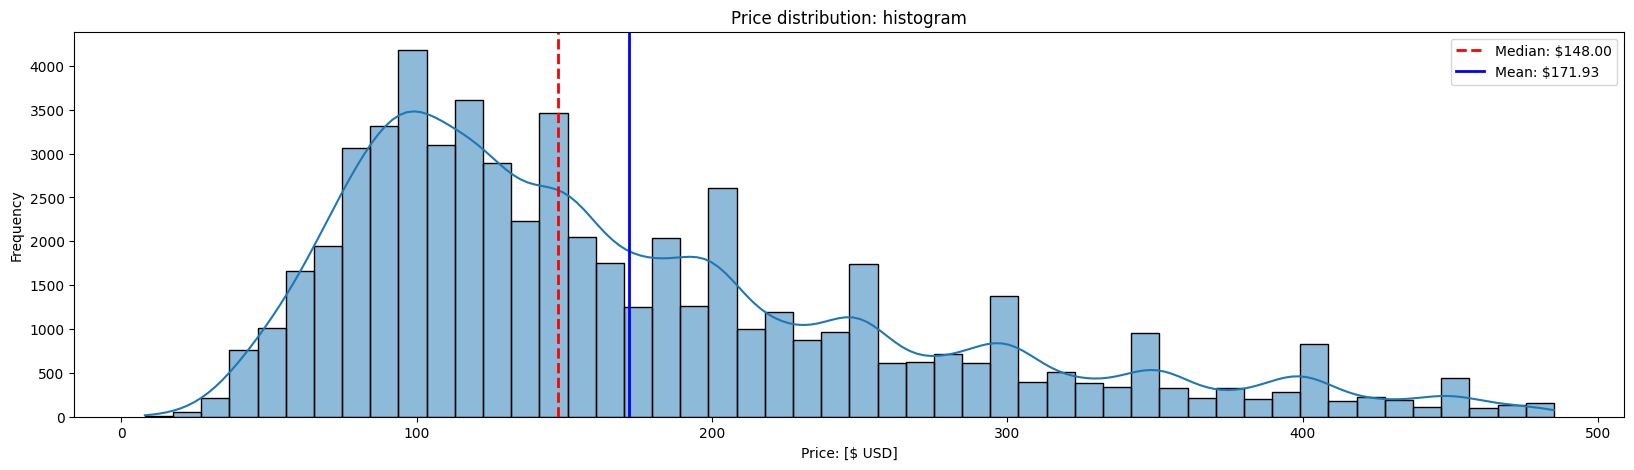

In [12]:
# calcular la variable media y mediana
median_price = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].median()
mean_price = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].mean()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50, kde=True)
plt.axvline(median_price, color='r', linestyle='--', linewidth=2, label=f'Median: ${median_price:.2f}')
plt.axvline(mean_price, color='b', linestyle='-', linewidth=2, label=f'Mean: ${mean_price:.2f}')

plt.xlabel("Price: [$ USD]")
plt.ylabel("Frequency")
plt.title("Price distribution: histogram")
plt.legend()
plt.show()

In [13]:
listings_df["price_float"].describe()

count    64230.000000
mean       256.023276
std        522.272191
min          8.000000
25%        103.000000
50%        155.000000
75%        256.000000
max      30400.000000
Name: price_float, dtype: float64

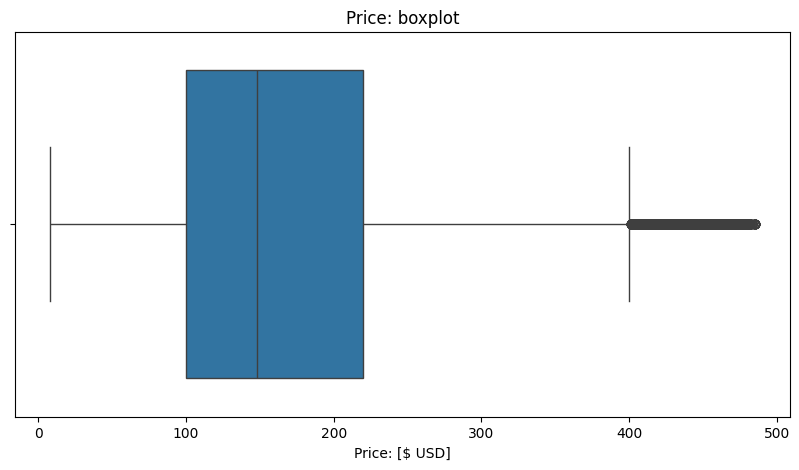

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"])
plt.xlabel("Price: [$ USD]")
plt.title("Price: boxplot")
plt.show()

##### **2.4.2-Room-type**

In [15]:
listings_df["room_type"].value_counts()

room_type
Entire home/apt    85268
Private room        9055
Hotel room           752
Shared room          386
Name: count, dtype: int64

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_12728\4289013208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")


Text(0, 0.5, 'Percentage')

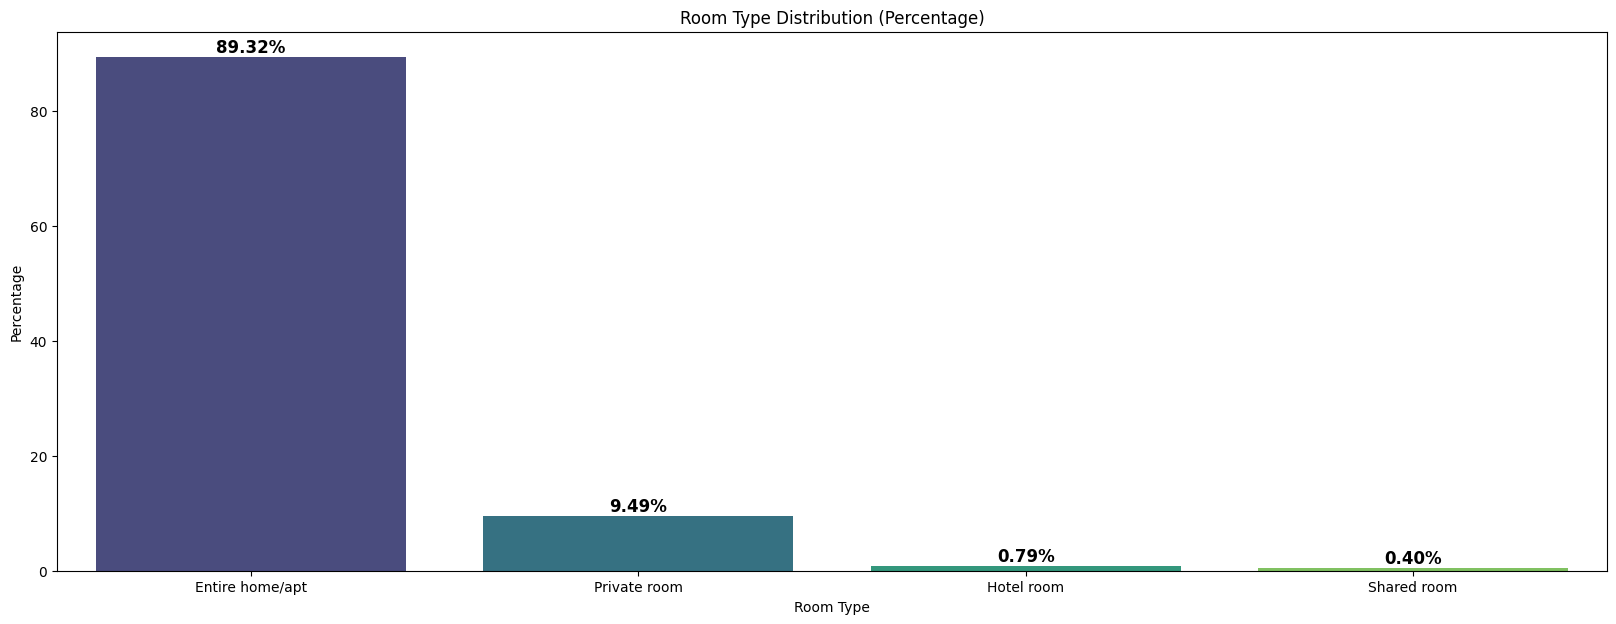

In [16]:
# se calculan los porcentajes de cada categoria
category_counts_rt = listings_df["room_type"].value_counts()
category_percentages_rt = (category_counts_rt / category_counts_rt.sum()) * 100

percentage_df_rt = category_percentages_rt.reset_index()
percentage_df_rt.columns = ["room_type", "percentage"]

plt.figure(figsize=(20, 7))
sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")
for index, row in percentage_df_rt.iterrows():
    plt.text(index, row["percentage"] + 0.8, f'{row["percentage"]:.2f}%', color='black', ha="center", fontsize=12, fontweight='bold')

plt.title("Room Type Distribution (Percentage)")
plt.xlabel("Room Type")
plt.ylabel("Percentage")

In [17]:
listings_df["room_type"].describe()

count               95461
unique                  4
top       Entire home/apt
freq                85268
Name: room_type, dtype: object

##### **2.4.3-Neighborhood**

In [18]:
listings_df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Buttes-Montmartre      10532
Popincourt              8392
Vaugirard               7727
Batignolles-Monceau     6673
Entrepôt                6464
Passy                   6225
Buttes-Chaumont         5387
Ménilmontant            5183
Opéra                   4652
Reuilly                 3988
Temple                  3908
Observatoire            3603
Gobelins                3274
Bourse                  3137
Panthéon                3026
Élysée                  2965
Hôtel-de-Ville          2857
Luxembourg              2724
Palais-Bourbon          2702
Louvre                  2042
Name: count, dtype: int64

In [19]:
listings_df["neighbourhood_cleansed"].describe()

count                 95461
unique                   20
top       Buttes-Montmartre
freq                  10532
Name: neighbourhood_cleansed, dtype: object

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_12728\2173573203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")


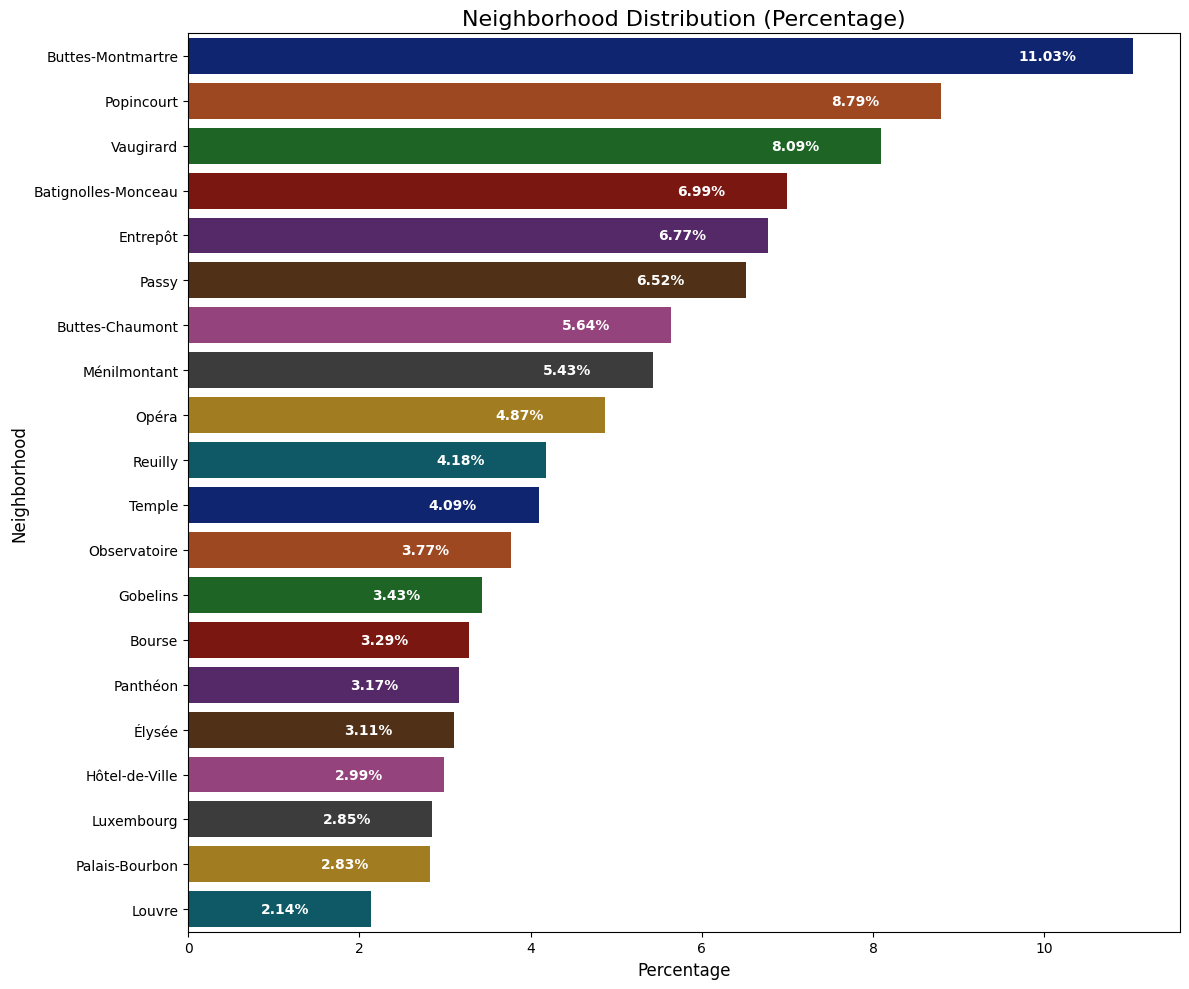

In [20]:
category_counts_n = listings_df["neighbourhood_cleansed"].value_counts()
category_percentages_n = (category_counts_n / category_counts_n.sum()) * 100

percentage_df_n = category_percentages_n.reset_index()
percentage_df_n.columns = ["neighbourhood_cleansed", "percentage"]
percentage_df = percentage_df_n.sort_values("percentage", ascending=False)

# Crear gráfica de barras para la distribución de los neighborhoods
plt.figure(figsize=(12, 10))
sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")

for index, row in percentage_df_n.iterrows():
    plt.text(row["percentage"] - 1, index, f'{row["percentage"]:.2f}%', 
             color='white', va="center", ha="center", fontsize=10, fontweight='bold')

plt.title("Neighborhood Distribution (Percentage)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.tight_layout()
plt.show()

##### **2.4.4-Availability-365**

[]

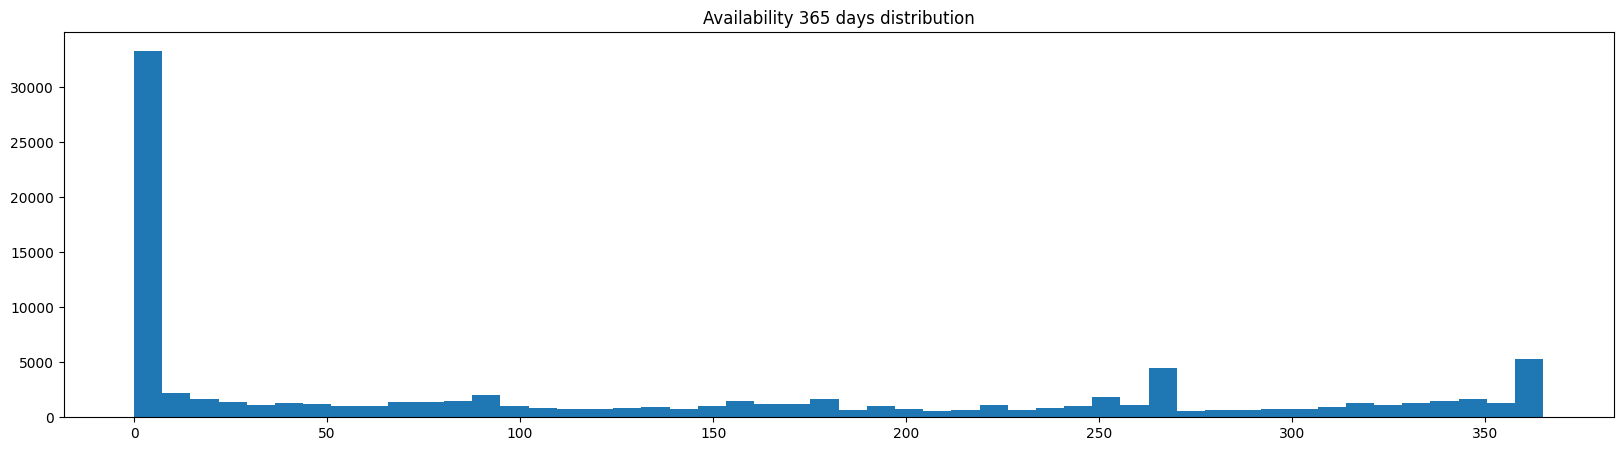

In [21]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["availability_365"], bins=50)
plt.title("Availability 365 days distribution")
plt.plot()

In [22]:
# calculo de los cuartiles y outliers
q1_a = listings_df["availability_365"].quantile(0.25)
q3_a = listings_df["availability_365"].quantile(0.75)
iqr_a = q3_a - q1_a
lower_bound_a = q1_a - 1.5*iqr_a
upper_bound_b = q3_a + 1.5*iqr_a
print(f"Lower bound: {lower_bound_a}")
print(f"Upper bound: {upper_bound_b}")

outliers_below_a = listings_df["availability_365"] < lower_bound_a
outliers_above_a = listings_df["availability_365"] > upper_bound_b
total_outliers_a = outliers_below_a.sum() + outliers_above_a.sum()

print(f"Total number of outliers: {total_outliers_a}")
print(f"Percentage of outliers: {round(total_outliers_a/listings_df.shape[0]*100, 2)}%")

Lower bound: -381.0
Upper bound: 635.0
Total number of outliers: 0
Percentage of outliers: 0.0%


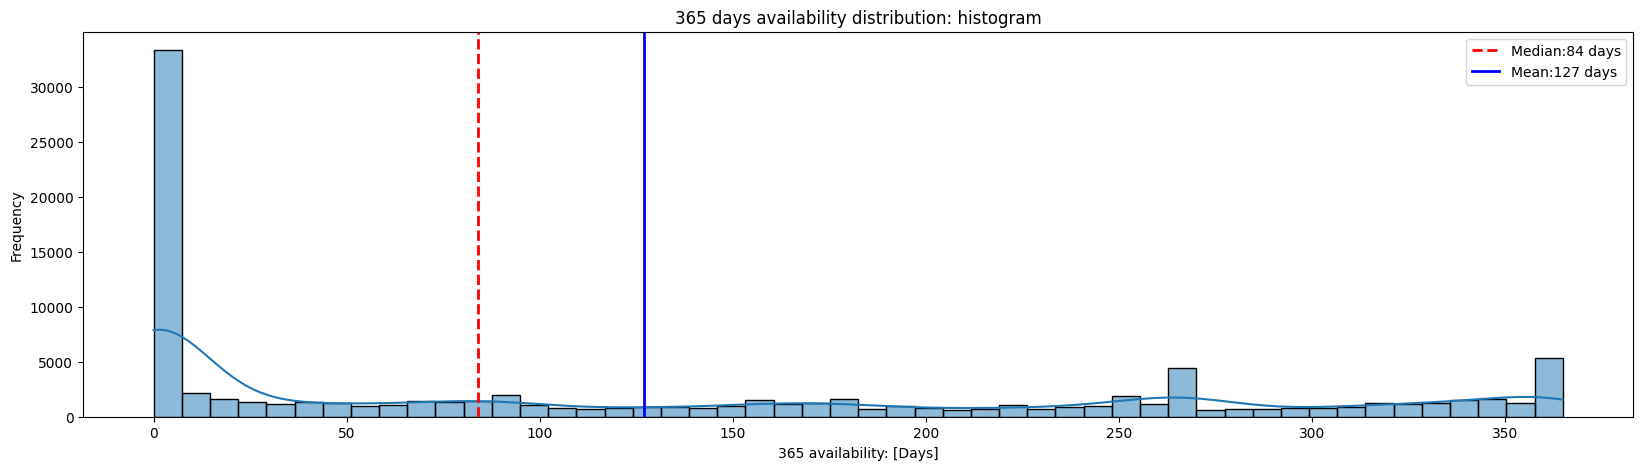

In [23]:
# calcular la variable media y mediana
median_price_a = listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"].median()
mean_price_a = listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"].mean()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"], bins=50, kde=True)
plt.axvline(median_price_a, color='r', linestyle='--', linewidth=2, label=f'Median:{median_price_a:.0f} days')
plt.axvline(mean_price_a, color='b', linestyle='-', linewidth=2, label=f'Mean:{mean_price_a:.0f} days')

plt.xlabel("365 availability: [Days]")
plt.ylabel("Frequency")
plt.title("365 days availability distribution: histogram")
plt.legend()
plt.show()

In [24]:
listings_df["availability_365"].describe()

count    95461.000000
mean       127.049518
std        130.788323
min          0.000000
25%          0.000000
50%         84.000000
75%        254.000000
max        365.000000
Name: availability_365, dtype: float64

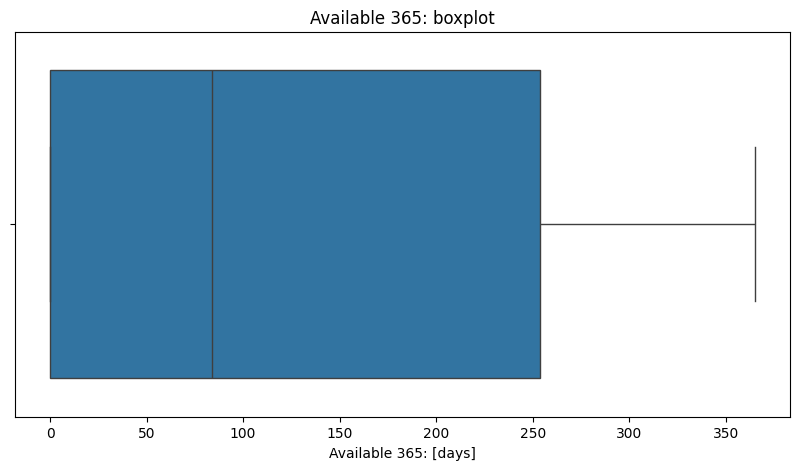

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"])
plt.xlabel("Available 365: [days]")
plt.title("Available 365: boxplot")
plt.show()

##### **2.4.5-Accommodates**

[]

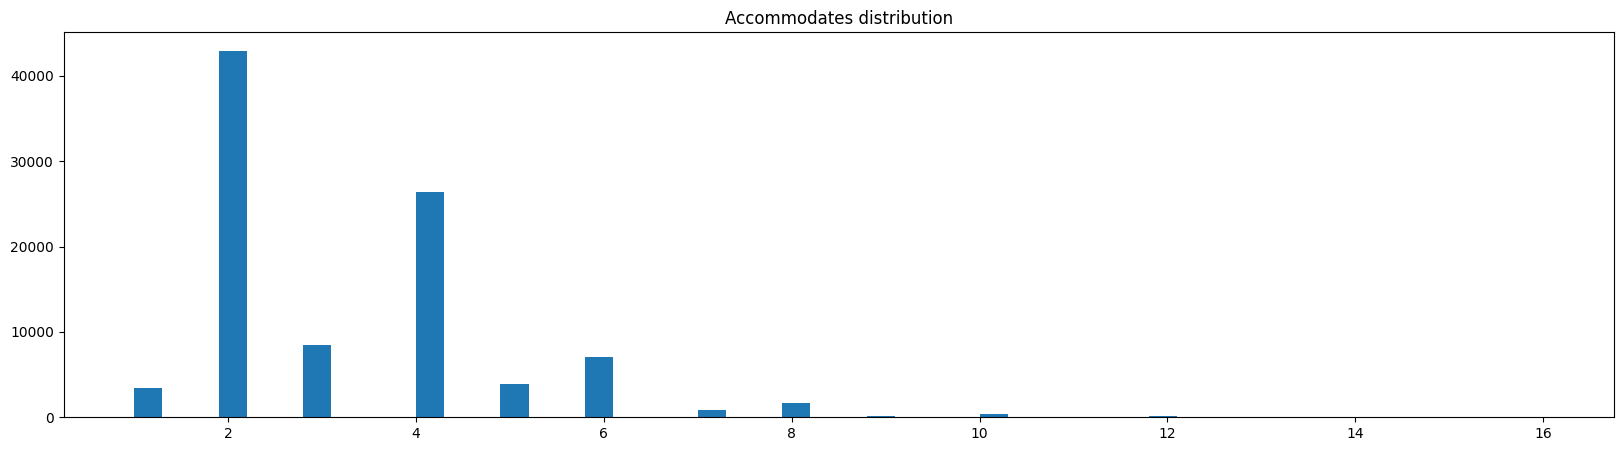

In [26]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["accommodates"], bins=50)
plt.title("Accommodates distribution")
plt.plot()

In [27]:
# calculo de los cuartiles y outliers
q1_d = listings_df["accommodates"].quantile(0.25)
q3_d = listings_df["accommodates"].quantile(0.75)
iqr_d = q3_d - q1_d
lower_bound_d = q1_d - 1.5*iqr_d
upper_bound_d = q3_d + 1.5*iqr_d
print(f"Lower bound: {lower_bound_d}")
print(f"Upper bound: {upper_bound_d}")

outliers_below_d = listings_df["accommodates"] < lower_bound_d
outliers_above_d = listings_df["accommodates"] > upper_bound_d
total_outliers_d = outliers_below_d.sum() + outliers_above_d.sum()

print(f"Total number of outliers: {total_outliers_d}")
print(f"Percentage of outliers: {round(total_outliers_d/listings_df.shape[0]*100, 2)}%")

Lower bound: -1.0
Upper bound: 7.0
Total number of outliers: 2433
Percentage of outliers: 2.55%


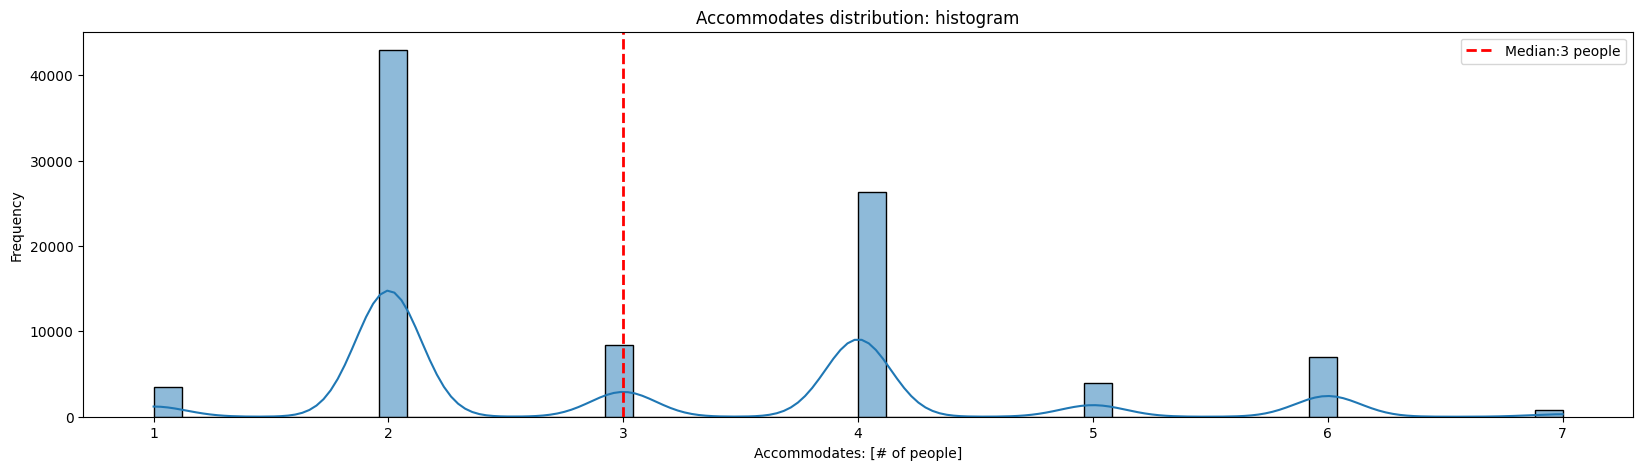

In [31]:
# calcular la variable media y mediana
median_price_d = listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"].median()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"], bins=50, kde=True)
plt.axvline(median_price_d, color='r', linestyle='--', linewidth=2, label=f'Median:{median_price_d:.0f} people')

plt.xlabel("Accommodates: [# of people]")
plt.ylabel("Frequency")
plt.title("Accommodates distribution: histogram")
plt.legend()
plt.show()

In [32]:
listings_df["accommodates"].describe()

count    95461.000000
mean         3.243890
std          1.658668
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

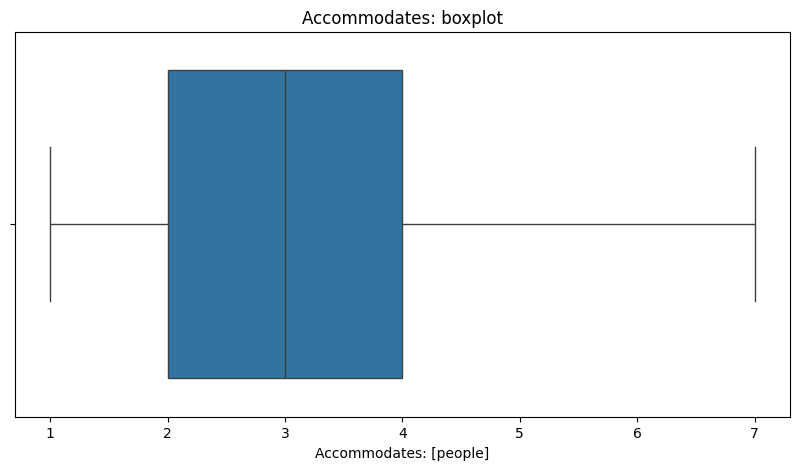

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"])
plt.xlabel("Accommodates: [people]")
plt.title("Accommodates: boxplot")
plt.show()

### **3-Analysis-strategy**

Describir de manera concreta en uno o dos párrafos la
estrategia de análisis y las técnicas que utilizará, con su respectiva justificación,
para dar respuesta al requerimiento de establecer la mejor opción de inversión
inmobiliaria. La estrategia debe contemplar desde el cálculo de estadísticos básicos
hasta el uso de técnicas gráficas que involucren varios atributos.

**Estrategia:** Como consultora de datos que está recomendando a los inversores en dónde invertir en Paris, se considerara una estrategia de cuatro pasos: 1) análisis descriptivo, 2) análisis visual (gráficos) y 3) pruebas de hipótesis.

1) **Análisis descriptivo:** Se calcularán estadísticos descriptivos como media, mediana, desviación estándar y cuartiles para variables numéricas clave como el precio, la capacidad de alojamiento (accommodates) y la disponibilidad anual (availability_365). Para las variables categóricas como el tipo de habitación y el tipo de propiedad, se examinará la moda y las frecuencias relativas. Esta exploración inicial permitirá comprender la distribución de los datos, identificar valores típicos y atípicos, y detectar posibles sesgos o tendencias en el mercado.

2)  **Data visualizations (gráficos):** Se emplearán gráficos de caja (boxplots) y/o gráficos de barras apilados para visualizar la distribución del precio en función del tipo de habitación y el tipo de propiedad. Esta técnica permitirá comparar visualmente los precios entre diferentes categorías, revelando diferencias en los rangos de precios y la dispersión de los datos, lo que ayudará a identificar los tipos de alojamiento más lucrativos. Finalmente, se construirán mapas de calor de correlaciones para examinar las relaciones entre todas las variables numéricas, incluyendo el precio, la disponibilidad y la capacidad de alojamiento.

3) **Pruebas de hipótesis:** Finalmente, se realizarán pruebas de hipótesis, como análisis de varianza (ANOVA) y pruebas t, para evaluar si existen diferencias significativas en el precio según el tipo de habitación, el tipo de propiedad y la presencia de reseñas. Estas pruebas estadísticas proporcionarán evidencia sólida para respaldar las recomendaciones de inversión

<div align="center">
    <img src="utils/strategy.png" alt="Paris">
</div>


### **4-Strategy-development**

Implementar la estrategia previamente definida
en donde se evidencie claramente cualquier tipo de procesamiento de datos que
haya tenido que realizar, las técnicas estadísticas o de visualización de datos
utilizadas y los insights extraídos tras la interpretación de los resultados.


#### **4.1-Analisis-descriptivo**

#### **4.2-Data-visualizations**

#### **4.3-Pruebas-de-hipotesis**